<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<font style="font-size:28px;" align="left"><b><font color="blue"> Solutions for </font>Rotations  </b></font>
<br>
_prepared by Abuzer Yakaryilmaz_
<br><br>

<a id="task2"></a>
<h3> Task 2 </h3>

Start with state $ \ket{0} $. 

Apply $ R(\pi/4) $ 7 times, and draw each state on the unit circle.

<h3>Solution</h3>

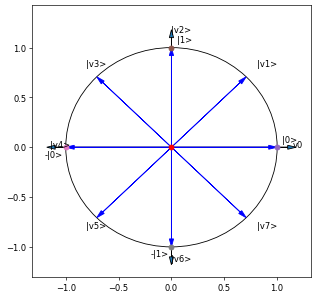

In [1]:
%run quantum.py

draw_qubit()

[x,y]=[1,0]

draw_quantum_state(x,y,"v0")

sqrttwo = 2**0.5
oversqrttwo = 1/sqrttwo

R = [ [oversqrttwo, -1*oversqrttwo], [oversqrttwo,oversqrttwo] ]

# function for rotation R
def rotate(px,py):
    newx = R[0][0]*px + R[0][1]*py
    newy = R[1][0]*px + R[1][1]*py
    return [newx,newy]

# apply rotation R 7 times
for i in range(1,8):
    [x,y] = rotate(x,y)
    draw_quantum_state(x,y,"|v"+str(i)+">")

show_plt()

<a id="task3"></a>
<h3> Task 3 </h3>

We implement Task 2 by using "ry-gate" and "statevector_simulator".

Define a quantum circuit with one qubit. 

Iterate seven times
- Apply the rotation with angle $ \pi \over 4 $ by using ry-gate
- Read the current quantum state
- Print the current quantum state
- Draw the quantum state on the unit circle by using the values of the current quantum state

<h3>Solution</h3>

iteration 1 : the quantum state is ( 0.707 ) |0> +( 0.707 ) |1>
iteration 2 : the quantum state is ( -0.0 ) |0> +( 1.0 ) |1>
iteration 3 : the quantum state is ( -0.707 ) |0> +( 0.707 ) |1>
iteration 4 : the quantum state is ( -1.0 ) |0> +( -0.0 ) |1>
iteration 5 : the quantum state is ( -0.707 ) |0> +( -0.707 ) |1>
iteration 6 : the quantum state is ( 0.0 ) |0> +( -1.0 ) |1>
iteration 7 : the quantum state is ( 0.707 ) |0> +( -0.707 ) |1>


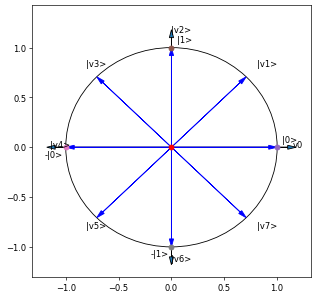

In [2]:
%run quantum.py

# Draw qubit
draw_qubit()
[x,y]=[1,0]

# Draw quantum state
draw_quantum_state(x,y,"v0")

# Import all necessary libraries
from math import pi
from projectq import MainEngine
from projectq.ops import Ry, Measure, All
from projectq.backends import Simulator, CircuitDrawerMatplotlib
from projectq.setups.default import get_engine_list

# Intialize engine objects
qdrawer = CircuitDrawerMatplotlib()
qengine = MainEngine(backend = Simulator(), engine_list = [qdrawer]+get_engine_list())

# Define circuit paratmeters
qubit = qengine.allocate_qureg(1)

# Degine rotation angle
rotation_angle = pi/4

for i in range (1,8):
    # Rotate qubit with angle pi/4
    Ry(2*rotation_angle) | qubit[0]
    
    # Remember to flush the engine!
    qengine.flush()
    
    # Here we need to obtain the statevector of the qubit. Remember this is not possible on real quantum backends. Hence we use the Simulator.cheat() function to get the amplitudes out
    x_value = qengine.backend.cheat()[1][0].real # get the amplitude of |0>
    y_value = qengine.backend.cheat()[1][1].real # get the amplitude of |1>
    print("iteration",i,": the quantum state is (",round(x_value,3),") |0>","+(",round(y_value,3),") |1>")
    
    # draw the current quantum state
    draw_quantum_state(x_value,y_value,"|v"+str(i)+">")
    
    # You can ignore the "Qubit has not been measured / uncomputed!" warning. Simulator.cheat() is a debugging method and we will lose the amplitudes if we measure.
show_plt()

<a id="task4"></a>
<h3> Task 4 </h3>

Repeat Task 3 for the angle $ \pi/6 $ by applying the rotation 12 times. 

Repeat Task 3 for the angle $ 3\pi/8 $ by applying the rotation 16 times. 

Repeat Task 3 for the angle $ \sqrt{2}\pi $ by applying the rotation 20 times. 

<h3>Solution</h3>

Repeat Task 3 for the angle $ \pi/6 $ by applying the rotation 12 times.

iteration 1 : the quantum state is ( 0.866 ) |0> +( 0.5 ) |1>
iteration 2 : the quantum state is ( 0.5 ) |0> +( 0.866 ) |1>
iteration 3 : the quantum state is ( -0.0 ) |0> +( 1.0 ) |1>
iteration 4 : the quantum state is ( -0.5 ) |0> +( 0.866 ) |1>
iteration 5 : the quantum state is ( -0.866 ) |0> +( 0.5 ) |1>
iteration 6 : the quantum state is ( -1.0 ) |0> +( -0.0 ) |1>
iteration 7 : the quantum state is ( -0.866 ) |0> +( -0.5 ) |1>
iteration 8 : the quantum state is ( -0.5 ) |0> +( -0.866 ) |1>
iteration 9 : the quantum state is ( 0.0 ) |0> +( -1.0 ) |1>
iteration 10 : the quantum state is ( 0.5 ) |0> +( -0.866 ) |1>
iteration 11 : the quantum state is ( 0.866 ) |0> +( -0.5 ) |1>
iteration 12 : the quantum state is ( 1.0 ) |0> +( 0.0 ) |1>


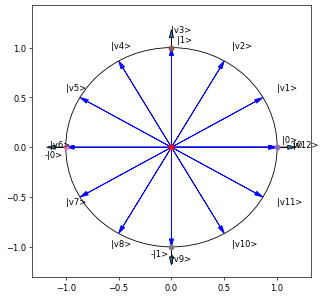

In [4]:
%run quantum.py

# Draw qubit
draw_qubit()
[x,y]=[1,0]

# Draw quantum state
draw_quantum_state(x,y,"v0")

# Import all necessary libraries
from math import pi
from projectq import MainEngine
from projectq.ops import Ry, Measure, All
from projectq.backends import Simulator, CircuitDrawerMatplotlib
from projectq.setups.default import get_engine_list

# Intialize engine objects
qdrawer = CircuitDrawerMatplotlib()
qengine = MainEngine(backend = Simulator(), engine_list = [qdrawer]+get_engine_list())

# Define circuit paratmeters
qubit = qengine.allocate_qureg(1)

# Define rotation angle
rotation_angle = pi/6

for i in range (1,13):
    # Rotate qubit with angle pi/4
    Ry(2*rotation_angle) | qubit[0]
    
    # Remember to flush the engine!
    qengine.flush()
    
    # Here we need to obtain the statevector of the qubit. Remember this is not possible on real quantum backends. Hence we use the Simulator.cheat() function to get the amplitudes out
    x_value = qengine.backend.cheat()[1][0].real # get the amplitude of |0>
    y_value = qengine.backend.cheat()[1][1].real # get the amplitude of |1>
    print("iteration",i,": the quantum state is (",round(x_value,3),") |0>","+(",round(y_value,3),") |1>")
    
    # draw the current quantum state
    draw_quantum_state(x_value,y_value,"|v"+str(i)+">")
    
# You can safely ignore the "Qubit has not been measured / uncomputed!" warning. Simulator.cheat() is a debugging method and we will lose the amplitudes if we measure.
Measure | qubit[0]

show_plt()

Repeat Task 3 for the angle $ 3\pi/8 $ by applying the rotation 16 times.

iteration 1 : the quantum state is ( 0.383 ) |0> +( 0.924 ) |1>
iteration 2 : the quantum state is ( -0.707 ) |0> +( 0.707 ) |1>
iteration 3 : the quantum state is ( -0.924 ) |0> +( -0.383 ) |1>
iteration 4 : the quantum state is ( -0.0 ) |0> +( -1.0 ) |1>
iteration 5 : the quantum state is ( 0.924 ) |0> +( -0.383 ) |1>
iteration 6 : the quantum state is ( 0.707 ) |0> +( 0.707 ) |1>
iteration 7 : the quantum state is ( -0.383 ) |0> +( 0.924 ) |1>
iteration 8 : the quantum state is ( -1.0 ) |0> +( 0.0 ) |1>
iteration 9 : the quantum state is ( -0.383 ) |0> +( -0.924 ) |1>
iteration 10 : the quantum state is ( 0.707 ) |0> +( -0.707 ) |1>
iteration 11 : the quantum state is ( 0.924 ) |0> +( 0.383 ) |1>
iteration 12 : the quantum state is ( 0.0 ) |0> +( 1.0 ) |1>
iteration 13 : the quantum state is ( -0.924 ) |0> +( 0.383 ) |1>
iteration 14 : the quantum state is ( -0.707 ) |0> +( -0.707 ) |1>
iteration 15 : the quantum state is ( 0.383 ) |0> +( -0.924 ) |1>
iteration 16 : the quantum stat

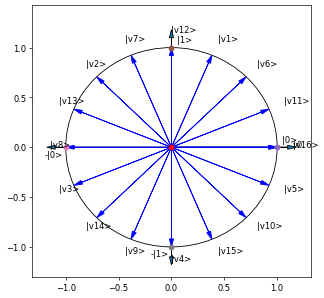

In [5]:
%run quantum.py

# Draw qubit
draw_qubit()
[x,y]=[1,0]

# Draw quantum state
draw_quantum_state(x,y,"v0")

# Import all necessary libraries
from math import pi
from projectq import MainEngine
from projectq.ops import Ry, Measure, All
from projectq.backends import Simulator, CircuitDrawerMatplotlib
from projectq.setups.default import get_engine_list

# Intialize engine objects
qdrawer = CircuitDrawerMatplotlib()
qengine = MainEngine(backend = Simulator(), engine_list = [qdrawer]+get_engine_list())

# Define circuit paratmeters
qubit = qengine.allocate_qureg(1)

# Degine rotation angle
rotation_angle = 3*pi/8

for i in range (1,17):
    # Rotate qubit with angle pi/4
    Ry(2*rotation_angle) | qubit[0]
    
    # Remember to flush the engine!
    qengine.flush()
    
    # Here we need to obtain the statevector of the qubit. Remember this is not possible on real quantum backends. Hence we use the Simulator.cheat() function to get the amplitudes out
    x_value = qengine.backend.cheat()[1][0].real # get the amplitude of |0>
    y_value = qengine.backend.cheat()[1][1].real # get the amplitude of |1>
    print("iteration",i,": the quantum state is (",round(x_value,3),") |0>","+(",round(y_value,3),") |1>")
    
    # draw the current quantum state
    draw_quantum_state(x_value,y_value,"|v"+str(i)+">")
    
    # You can safely ignore the "Qubit has not been measured / uncomputed!" warning. Simulator.cheat() is a debugging method and we will lose the amplitudes if we measure.
show_plt()

Repeat Task 3 for the angle $ \sqrt{2}\pi $ by applying the rotation 20 times. 

iteration 1 : the quantum state is ( -0.266 ) |0> +( -0.964 ) |1>
iteration 2 : the quantum state is ( -0.858 ) |0> +( 0.513 ) |1>
iteration 3 : the quantum state is ( 0.723 ) |0> +( 0.691 ) |1>
iteration 4 : the quantum state is ( 0.473 ) |0> +( -0.881 ) |1>
iteration 5 : the quantum state is ( -0.975 ) |0> +( -0.221 ) |1>
iteration 6 : the quantum state is ( 0.046 ) |0> +( 0.999 ) |1>
iteration 7 : the quantum state is ( 0.951 ) |0> +( -0.311 ) |1>
iteration 8 : the quantum state is ( -0.552 ) |0> +( -0.834 ) |1>
iteration 9 : the quantum state is ( -0.656 ) |0> +( 0.754 ) |1>
iteration 10 : the quantum state is ( 0.902 ) |0> +( 0.432 ) |1>
iteration 11 : the quantum state is ( 0.176 ) |0> +( -0.984 ) |1>
iteration 12 : the quantum state is ( -0.996 ) |0> +( 0.092 ) |1>
iteration 13 : the quantum state is ( 0.354 ) |0> +( 0.935 ) |1>
iteration 14 : the quantum state is ( 0.807 ) |0> +( -0.59 ) |1>
iteration 15 : the quantum state is ( -0.784 ) |0> +( -0.621 ) |1>
iteration 16 : the q

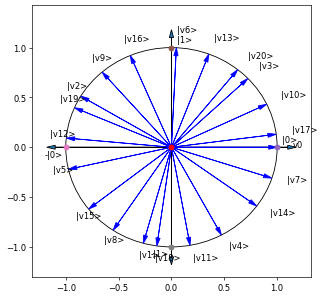

In [6]:
%run quantum.py

# Draw qubit
draw_qubit()
[x,y]=[1,0]

# Draw quantum state
draw_quantum_state(x,y,"v0")

# Import all necessary libraries
from math import pi
from projectq import MainEngine
from projectq.ops import Ry, Measure, All
from projectq.backends import Simulator, CircuitDrawerMatplotlib
from projectq.setups.default import get_engine_list

# Intialize engine objects
qdrawer = CircuitDrawerMatplotlib()
qengine = MainEngine(backend = Simulator(), engine_list = [qdrawer]+get_engine_list())

# Define circuit paratmeters
qubit = qengine.allocate_qureg(1)

# Degine rotation angle
rotation_angle = 2**(0.5) * pi

for i in range (1,21):
    # Rotate qubit with angle pi/4
    Ry(2*rotation_angle) | qubit[0]
    
    # Remember to flush the engine!
    qengine.flush()
    
    # Here we need to obtain the statevector of the qubit. Remember this is not possible on real quantum backends. Hence we use the Simulator.cheat() function to get the amplitudes out
    x_value = qengine.backend.cheat()[1][0].real # get the amplitude of |0>
    y_value = qengine.backend.cheat()[1][1].real # get the amplitude of |1>
    print("iteration",i,": the quantum state is (",round(x_value,3),") |0>","+(",round(y_value,3),") |1>")
    
    # draw the current quantum state
    draw_quantum_state(x_value,y_value,"|v"+str(i)+">")
    
    # You can safely ignore the "Qubit has not been measured / uncomputed!" warning. Simulator.cheat() is a debugging method and we will lose the amplitudes if we measure.
show_plt()

<a id="task6"></a>
<h3> Task 6 </h3>

We randomly pick an angle $ \theta \in [0,2\pi) $.

We have two separate qubits initially set to state $ \ket{0} $. 

The first qubit is rotated by the angle $ \theta $ and the second qubit is rotated by the angle $ \theta + \pi/2 $.

Implement each qubit and its rotation as a separate quantum circuit.

Then, read both quantum states and calculate their dot product.

Check the result of the dot product for different random angles.

<h3>Solution</h3>

In [8]:
# Import all necessary libraries
from math import pi
from projectq import MainEngine
from projectq.ops import Ry, Measure, All
from projectq.backends import Simulator
from projectq.setups.default import get_engine_list
from random import randrange
from IPython.display import HTML

for i in range(10):
    # Pick a random angle
    random_angle = randrange(3600)/10

    # Specify the rotation angles
    rotation_angle1 = random_angle/360*2*pi
    rotation_angle2 = rotation_angle1 + pi/2

    # First Circuit. Here we can initialize different engine variables to denote different circuits
    qengine1 = MainEngine(backend = Simulator(), engine_list = []+get_engine_list())

    # Intialize qubits of the first circuit
    qubit1 = qengine1.allocate_qureg(1)

    # Rotate the qubit
    Ry(2*rotation_angle1) | qubit1[0]

    # Flushing qengine1 value to backend
    qengine1.flush()
    
    # Get state vector
    [x1,y1]=[qengine1.backend.cheat()[1][0].real, qengine1.backend.cheat()[1][1].real]
    
    # Second Circuit. Note we are assigning a different engine variable name
    qengine2 = MainEngine(backend = Simulator(), engine_list = []+get_engine_list())
       
    # Intialize qubits of the second circuit
    qubit2 = qengine2.allocate_qureg(1)

    # Rotate the qubit
    Ry(2*rotation_angle2) | qubit2[0]

    # Flushing qengine2 value to backend
    qengine2.flush()
    
    # Get state vector
    [x2,y2]=[qengine2.backend.cheat()[1][0].real, qengine2.backend.cheat()[1][1].real]
    
    # Just to ignore warning we are measuring the qubits. You do not need to measure in this exercise but we are doing this just for ignoring warnings
    Measure | qubit1[0] # Just to get rid of the warnings. You may comment this
    Measure | qubit2[0] # Just to get rid of the warnings. You may comment this
    
    print(i,"- The result of dot product is ",round(x1*x2+y1*y2,5))
    print("Random angle is",random_angle)
    print("Values of x1 , y1 =",round(x1,5),round(y1,5))
    print("Values of x2 , y2 =",round(x2,5),round(y2,5))
    print()
    

0 - The result of dot product is  -0.0
Random angle is 307.6
Values of x1 , y1 = 0.61015 -0.79229
Values of x2 , y2 = 0.79229 0.61015

1 - The result of dot product is  -0.0
Random angle is 25.1
Values of x1 , y1 = 0.90557 0.4242
Values of x2 , y2 = -0.4242 0.90557

2 - The result of dot product is  -0.0
Random angle is 137.0
Values of x1 , y1 = -0.73135 0.682
Values of x2 , y2 = -0.682 -0.73135

3 - The result of dot product is  0.0
Random angle is 29.9
Values of x1 , y1 = 0.8669 0.49849
Values of x2 , y2 = -0.49849 0.8669

4 - The result of dot product is  -0.0
Random angle is 175.9
Values of x1 , y1 = -0.99744 0.0715
Values of x2 , y2 = -0.0715 -0.99744

5 - The result of dot product is  -0.0
Random angle is 164.0
Values of x1 , y1 = -0.96126 0.27564
Values of x2 , y2 = -0.27564 -0.96126

6 - The result of dot product is  -0.0
Random angle is 121.3
Values of x1 , y1 = -0.51952 0.85446
Values of x2 , y2 = -0.85446 -0.51952

7 - The result of dot product is  -0.0
Random angle is 51.5


<a id="task7"></a>
<h3> Task 7 </h3>

We randomly pick an angle $ \theta \in [0,2\pi) $.

We have a single qubit initially set to state $ \ket{0} $. 

The qubit is rotated by the angle either $ \theta_1 =  \theta $ or $ \theta_2 =  \theta-\pi/2 $.

You are allowed to do one more rotation $ \theta' $ and then make a measurement.

Can you determine the angle of the first rotation angle by looking/using the measurement result? Is it $ \theta_1 $ or $ \theta_2 $?

Check your solution for different random angles.

<h3>Solution</h3>

In [10]:
# Import all necessary libraries
from random import randrange
from math import pi
from projectq import MainEngine
from projectq.ops import Ry, Measure, All
from projectq.backends import Simulator, CircuitDrawerMatplotlib
from projectq.setups.default import get_engine_list

# Intialize engine objects
qdrawer = CircuitDrawerMatplotlib()
qengine = MainEngine(backend = Simulator(), engine_list = [qdrawer]+get_engine_list())

# Define randome angle and rotation angles
random_angle = randrange(3600)/10
rotation_angle1 = random_angle/360*2*pi
rotation_angle2 = rotation_angle1 - pi/2

# Define circuit paratmeters
qubit = qengine.allocate_qureg(1)

if randrange(2) == 0:
    Ry(2*rotation_angle1) | qubit[0]
    picked_angle = "theta_1"

else:
    Ry(2*rotation_angle2) | qubit[0]
    picked_angle = "theta_2"
    
your_guess = ""

# The new state will be either |0> or -|1>
Ry(-2*rotation_angle1) | qubit[0]

# Flush engine
qengine.flush()

# Measure qubits
Measure | qubit[0]

if int(qubit[0]) == 0:
    your_guess = "theta1"
else:
    your_guess = "theta2"


######################
print("Ouput : {}".format(int(qubit[0])))
print("Your guess is",your_guess)
print("Picked_angle is",picked_angle)

Ouput : 1
Your guess is theta2
Picked_angle is theta_2
